# Project: DaXiGua Agency

In [2]:
from State import State
from Movement_evaluation import evaluate_by_gravity
import numpy as np
import random
import time
from Ball import Ball
from Config import *
from Game import Game

## Test the movement evaluation

运动规则如下：

1. 所有球受重力影响下坠
2. 与墙壁和地板的碰撞无反弹
3. 有空气阻力，小球下落速度越大阻力越大
4. 所有球之间的碰撞有一定的速度损失，并非完全弹性碰撞
5. 两个同样大小的小球相撞后合成新的小球，新的小球半径增大50% （这一条需根据具体游戏规则再进行修改）

In [2]:
state_test_1 = State(screen_x, 
                     screen_y, 
                     [Ball(np.array([100, 375]), np.array([-10, -10.0]), ball_level = 1),
                      Ball(np.array([180, 55]), np.array([0, 0]), ball_level = 5),
                      
                      Ball(np.array([150, 295]), np.array([0, 0]), ball_level = 8),
                      Ball(np.array([50, 185]), np.array([10, 10]), ball_level = 7),
                      Ball(np.array([50, 60]), np.array([20, 0]), ball_level = 2),
                      Ball(np.array([100, 60]), np.array([0, 0]), ball_level = 1),
                      Ball(np.array([200, 200]), np.array([0, 0]), ball_level = 0)],
                     end_line)

In [3]:
state_test_1, obtained_score = evaluate_by_gravity(state_test_1, plot=False, verbose = False)

In [4]:
for b in state_test_1.balls:
    print(b)

Position, x: 20.0, y: 84.44670106459063 
Velocity, vx: 0, vy: 0 
Level: 1,Radius: 20

Position, x: 178.61920743354017, y: 51.5 
Velocity, vx: 0, vy: 0 
Level: 5,Radius: 51.5

Position, x: 168.0, y: 268.2691245965895 
Velocity, vx: 0, vy: 0 
Level: 8,Radius: 84

Position, x: 92.4306837605735, y: 135.32530910648325 
Velocity, vx: 0, vy: 0 
Level: 7,Radius: 69

Position, x: 38.12448632442299, y: 34.0 
Velocity, vx: 0, vy: 0 
Level: 2,Radius: 34

Position, x: 102.20279394456392, y: 20.0 
Velocity, vx: 0, vy: 0 
Level: 1,Radius: 20

Position, x: 236.0, y: 16.0 
Velocity, vx: 0, vy: 0 
Level: 0,Radius: 16



In [5]:
state_test_1.balls.append(Ball(np.array([195, 440]), np.array([0, 0]), ball_level = 0))

In [7]:
state_test_1.vectorize()

array([0.12698413, 0.26984127, 0.        , 0.15873016, 0.        ,
       0.        , 0.12698413, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.40873016, 0.        , 0.        ,
       0.15873016, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.54761905,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.66666667, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

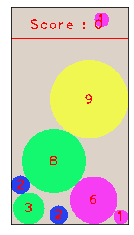

In [6]:
state_test_1.plot_state(is_plt=True)

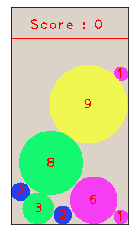

In [9]:
state_test_1.plot_state(is_plt=True)

### State after evaluation
<img src = "figures/sample_2_res.jpg" width="200"/>

## Test game

In [7]:
game = Game(screen_x, screen_y, end_line, balls_setting, max_random_ball_level)

In [8]:
# the inital state of the game
game.current_state.plot_state()

### Step 0
<img src = "figures/sample_game_step0.jpg" width="200"/>

In [9]:
# We drop the ball from the middle of the screen
action = screen_x/2
next_state, reward, is_finish = game.next_step(action)

In [10]:
next_state.plot_state()

### Step 1
The green ball drops to the bottom, and a new blue ball is added
<img src = "figures/sample_game_step1.jpg" width="200"/>

# Test Environment with a Random Agent

In [3]:
class Random_Agent(object):
        
    def get_action(self, state):
        
        return random.randint(0, int(state.screen_x))

In [4]:
def play_one_episode(game, agent, plot = False):
    is_finish = False
    current_state = game.init_state()
    reward_recorder = []
    step = 1

    while not is_finish:
        action = agent.get_action(current_state)
        next_state, reward, is_finish = game.next_step(action, verbose = False)
        if plot:
            next_state.plot_state()
        reward_recorder.append(reward)
        current_state = next_state
    
    return reward_recorder[-1], reward_recorder, game.current_reward

In [5]:
start_time = time.time()
game = Game(screen_x, screen_y, end_line, balls_setting, max_random_ball_level)
random_agent = Random_Agent()
play_one_episode(game, random_agent)
end_time = time.time()
print("Used ", end_time-start_time, "s.")

Used  19.665765047073364 s.


In [6]:
game.current_state.plot_state()

In [7]:
random_agent = Random_Agent()

final_rewards = [] # sum of the score at each step
scores = []

start_time = time.time()
for i in range(20):
    game = Game(screen_x, screen_y, end_line, balls_setting, max_random_ball_level)
    R, _, score = play_one_episode(game, random_agent)
    print(i, "\t th episode: ", R)
    final_rewards.append(R)
    scores.append(score)
end_time = time.time()

print( (end_time - start_time)//60 )

0 	 th episode:  159
1 	 th episode:  241
2 	 th episode:  192
3 	 th episode:  148
4 	 th episode:  159
5 	 th episode:  136
6 	 th episode:  191
7 	 th episode:  107
8 	 th episode:  230
9 	 th episode:  185
10 	 th episode:  110
11 	 th episode:  220
12 	 th episode:  196
13 	 th episode:  141
14 	 th episode:  210
15 	 th episode:  169
16 	 th episode:  180
17 	 th episode:  173
18 	 th episode:  138
19 	 th episode:  203
7.0


In [8]:
from matplotlib import pyplot as plt

Text(0.5, 0, 'Points')

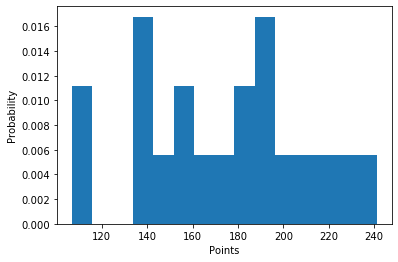

In [9]:
plt.hist(final_rewards, density=True, bins=15)
plt.ylabel('Probability')
plt.xlabel('Points')

In [10]:
np.mean(final_rewards)

174.4

In [11]:
np.std(final_rewards)

36.5340936660539

# Imitate Learning

In [12]:
game = Game(screen_x, screen_y, end_line, balls_setting, max_random_ball_level)

In [91]:
N_feature = len(game.current_state.vectorize())
N_sample = 5000
X_train = np.zeros( (N_sample, N_feature ) )
Y_train = np.zeros( N_sample )
current_row = 0

In [92]:
def manual_play_one_episode():
    game = Game(screen_x, screen_y, end_line, balls_setting, max_random_ball_level)
    is_finish = False
    current_state = game.init_state()
    reward_recorder = []
    step = 1
    global current_row

    while not is_finish:
        current_state.plot_state(is_plt=True)
        X_train[current_row, :] = current_state.vectorize()
        action = int(current_state.screen_x * float(input("give your choice: ")))
        next_state, reward, is_finish = game.next_step(action, verbose = False)
        Y_train[current_row] = action
        current_row += 1
        current_state = next_state
        reward_recorder.append(reward)
    return reward_recorder[-1], reward_recorder, game.current_reward

In [107]:
current_row

241

In [103]:
current_row = 182

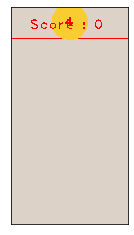

give your choice: .5


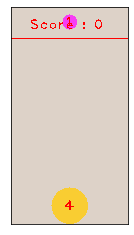

give your choice: .5


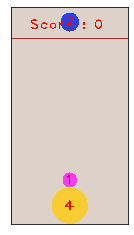

give your choice: .5


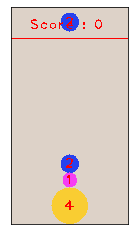

give your choice: .5


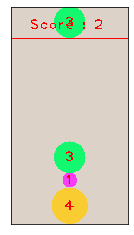

give your choice: .5


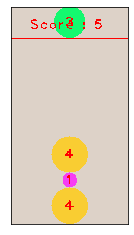

give your choice: .5


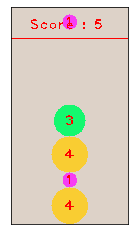

give your choice: .5


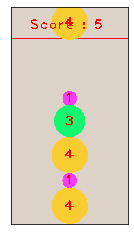

give your choice: .5


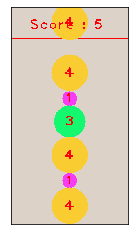

give your choice: .5


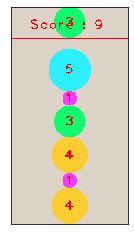

give your choice: .3


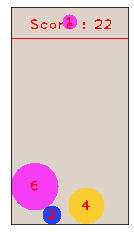

give your choice: .88


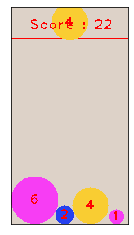

give your choice: 0.67


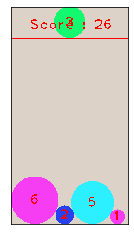

give your choice: 0.99


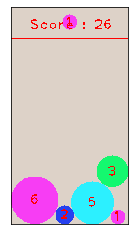

give your choice: 0.01


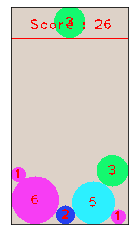

give your choice: 0.99


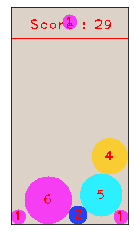

give your choice: 0.01


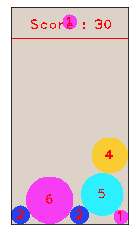

give your choice: 0.01


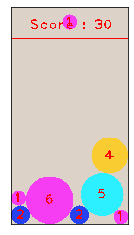

give your choice: 0.01


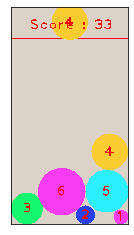

give your choice: 0.99


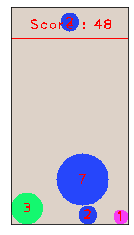

give your choice: 0.89


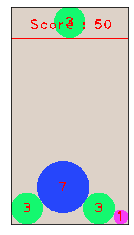

give your choice: 0.78


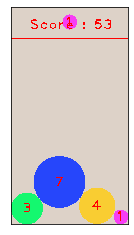

give your choice: 0.99


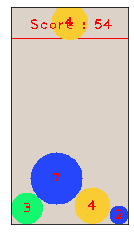

give your choice: 0.88


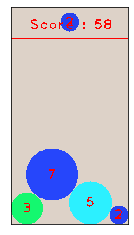

give your choice: 0.99


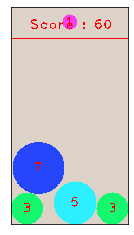

give your choice: 0.99


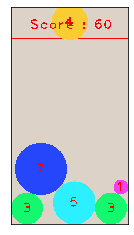

give your choice: 0.78


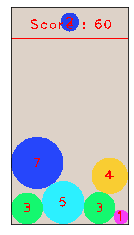

give your choice: 0.99


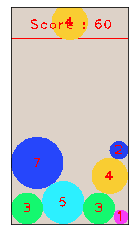

give your choice: 0.78


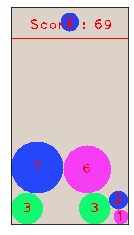

give your choice: 0.99


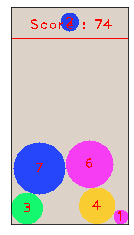

give your choice: 0.01


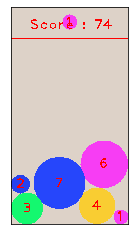

give your choice: 0.05


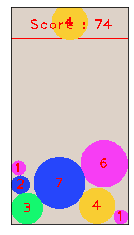

give your choice: 0.67


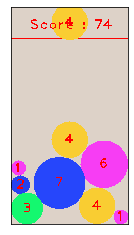

give your choice: 0.67


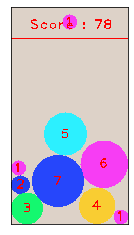

give your choice: 0.01


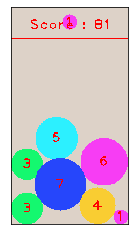

give your choice: 0.01


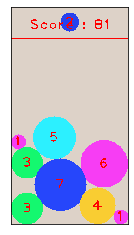

give your choice: 0.23


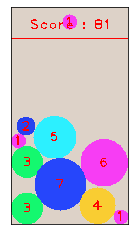

give your choice: 0.01


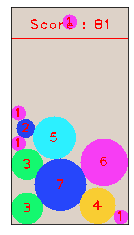

give your choice: 0.01


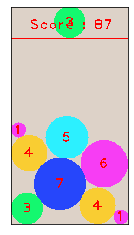

give your choice: 0.23


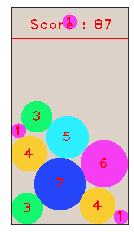

give your choice: 0.01


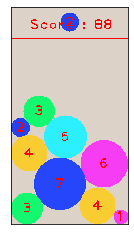

give your choice: 0.01


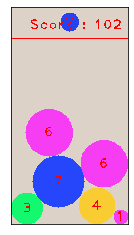

give your choice: 0.01


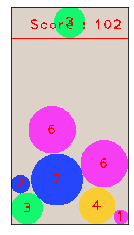

give your choice: 0.01


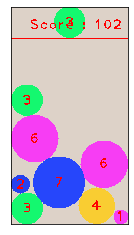

give your choice: 0.23


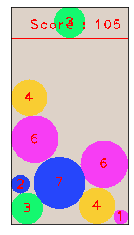

give your choice: 0.99


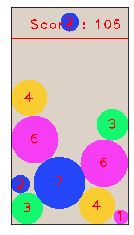

give your choice: 0.99


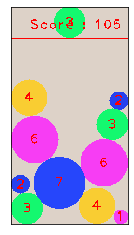

give your choice: 0.56


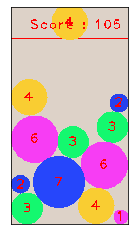

give your choice: 0.01


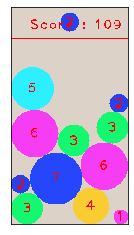

give your choice: 0.99


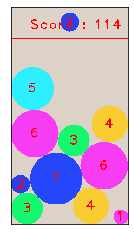

give your choice: 0.56


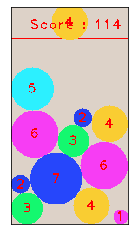

give your choice: 0.99


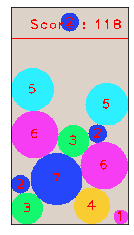

give your choice: 0.45


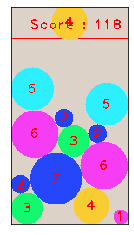

give your choice: 0.23


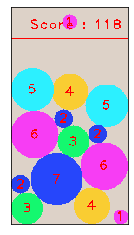

give your choice: 0.99


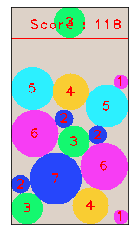

give your choice: 0.78


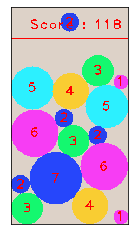

give your choice: 0.23


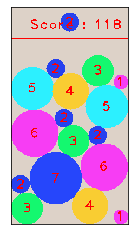

give your choice: 0.23


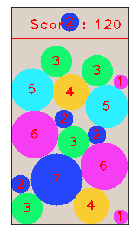

give your choice: 0.01


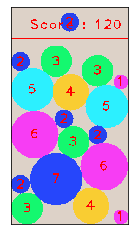

give your choice: 0.23


(183,
 [0,
  0,
  0,
  2,
  5,
  5,
  5,
  5,
  9,
  22,
  22,
  26,
  26,
  26,
  29,
  30,
  30,
  33,
  48,
  50,
  53,
  54,
  58,
  60,
  60,
  60,
  60,
  69,
  74,
  74,
  74,
  74,
  78,
  81,
  81,
  81,
  81,
  87,
  87,
  88,
  102,
  102,
  102,
  105,
  105,
  105,
  105,
  109,
  114,
  114,
  118,
  118,
  118,
  118,
  118,
  118,
  120,
  120,
  183],
 183)

In [106]:
manual_play_one_episode()

In [108]:
np.savetxt('X_train_1.csv', X_train[:current_row], delimiter=',') 

In [109]:
np.savetxt('Y_train_1.csv', Y_train[:current_row], delimiter=',') 

In [112]:
print(X_train[current_row//2-1])
print(Y_train[current_row//2-1])

[0.26984127 0.26984127 0.         0.31349206 0.         0.
 0.         0.         0.         0.         0.         0.
 0.4484127  0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.4484127
 0.         0.         0.         0.36507937 0.         0.
 0.         0.         0.         0.         0.         0.
 0.31349206 0.         0.         0.         0.         0.15873016
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
2.0


In [46]:
def vectorize_old2new(old_vector, end_line, screen_x, screen_y, grid_size = 40):
    
    K = (old_vector.shape[0] - 1) // 3
    M = int(end_line / grid_size) + 1
    N = int(screen_x / grid_size) + 1
    
    result = np.zeros(M * N + 1)
    result[0] = old_vector[0]
    for i in range(K):
        grid_x = int(old_vector[3 * i + 1] * screen_x / grid_size)
        grid_y = int(old_vector[3 * i + 2] * screen_y / grid_size)
        if old_vector[3 * i + 3] > 0:
            result[1 + N * grid_y + grid_x ] = old_vector[3 * i + 3]
    return result